# DRUG CONSUMPTION

## FOCUS ON CANNABIS USAGE & PREDICTION

![Cannabis Users](images/cannabis.jpg "Cannabis Leaf")

***


## Data Processing Starts Here 

* Load the dependencies and libraries

In [1]:
import pandas as pd
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

### Load, Clean and Filter the Original .data file

* The train/test data set was provided already grouped into bins, or Machine Learning ready. The ETL process for this dataset consisted of loading the data with the original headers.

In [2]:
# Read the "Drug consumption (quantified) Data Set"
# from: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

# Define the data headers
names = ['id','age', 'gender', 'education', 'country',
'ethnicity', 'neuroticism', 'extraversion', 'openness',
'agreeableness','conscientiousness', 'impulsiveness', 
'sensation', 'alcohol', 'amphet', 'amyl', 'benzos', 'caffeine', 
'cannabis', 'chocolate', 'cocaine', 'crack', 'ecstasy', 
'heroin', 'ketamine', ' legalh', 'lsd', 
'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']
df = pd.read_csv('data/drug_consumption.data', names=names)
df = df.drop(df.index[0])

In [3]:
df.head(2)

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


### Selecting the Model Features 

* After loading the headers, we then filtered the features to be used with or model.

In [4]:
# Filter the features we want in our model 
### add remove personality traits here ###
df_filtered = df[['id','age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness', 'agreeableness', 'conscientiousness', 
          'impulsiveness', 'sensation', 'cannabis']]

In [5]:
df_filtered.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
1,2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3


### Label Encoding

* The third step was to encode the seven cannabis classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day" down to two, 0 = never used and 1 = used.

In [6]:
# Original data had cannabis usage divided into 7 categories
df_filtered = df_filtered.replace({
    'CL0' : 0, ## Never Used cannabis
    'CL1' : 1, ## Used cannabis over a decade ago
    'CL2' : 1, ## Used in last decade
    'CL3' : 1, ## Used in last year
    'CL4' : 1, ## Used in last month
    'CL5' : 1, ## Used in last week
    'CL6' : 1}) ## Used in last day

# Cannabis used categories were combined into one category.
# 0 = never used
# 1 = used -past or present-
df_filtered.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
1,2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1


### Save CSV to Use with the Model 

* The new generated CSV will be loaded and used with our model.

In [7]:
export_csv = df_filtered.to_csv ('data/model_test_train_data_original.csv', index = None, header=True)

***

### New ETL for Use with Matplotlib

* Loaded the saved CSV file and normalized the values for use with Matplotlib

In [8]:
df_plot = pd.read_csv('data/model_test_train_data_original.csv', low_memory=False)

### Add 3 new columns to the dataframe 

* Created 3 new columns with the purpose of having a reference for the age, gender and education columns

In [9]:
df_plot.insert(1, "age_category", True)
df_plot.insert(3, "gender_category", True)
df_plot.insert(5, "education_category", True)

* Populated the new columns with existing data

In [10]:
df_plot['age_category'] = df_plot['age']
df_plot['gender_category'] = df_plot['gender']
df_plot['education_category'] = df_plot['education']

In [11]:
df_plot.head()

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,-0.07854,-0.07854,-0.48246,-0.48246,1.98437,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,0.49788,0.49788,-0.48246,-0.48246,-0.05921,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
2,4,-0.95197,-0.95197,0.48246,0.48246,1.16365,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,5,0.49788,0.49788,0.48246,0.48246,1.98437,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
4,6,2.59171,2.59171,0.48246,0.48246,-1.22751,-1.22751,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0


### Converted the original bins to strings

In [12]:
df_plot['age_category']=df_plot['age_category'].astype('str')
df_plot['age']=df_plot['age'].astype('str')
df_plot['gender_category']=df_plot['gender_category'].astype('str')
df_plot['gender']=df_plot['gender'].astype('str')
df_plot['education_category']=df_plot['education_category'].astype('str')
df_plot['education']=df_plot['education'].astype('str')
df_plot['age_category']=df_plot['age_category'].str.replace('0','A')
df_plot['age']=df_plot['age'].str.replace('0','A')
df_plot['gender_category']=df_plot['gender_category'].str.replace('0','M')
df_plot['gender']=df_plot['gender'].str.replace('0','M')
df_plot['education_category']=df_plot['education_category'].str.replace('0','E')
df_plot['education']=df_plot['education'].str.replace('0','E')

df_plot.head()

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,-A.A7854,-A.A7854,-M.48246MMMMMMMMMM1,-M.48246MMMMMMMMMM1,1.98437,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,A.49788,A.49788,-M.48246MMMMMMMMMM1,-M.48246MMMMMMMMMM1,-E.E5921EEEEEEEEEEE1,-E.E5921EEEEEEEEEEE1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
2,4,-A.95197,-A.95197,M.48246MMMMMMMMMM1,M.48246MMMMMMMMMM1,1.16365,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,5,A.49788,A.49788,M.48246MMMMMMMMMM1,M.48246MMMMMMMMMM1,1.98437,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
4,6,2.59171,2.59171,M.48246MMMMMMMMMM1,M.48246MMMMMMMMMM1,-1.22751,-1.22751,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0


In [13]:
df_plot['age_category'].replace({
    '-A.95197' :'18-24',
    '-A.A7854':'25-34',
    'A.49788':'35-44',
    '1.A9449':'45-54',
    '1.82213':'55-64',
    '2.59171':'65+'}, 
    inplace=True)
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,-A.A7854,-M.48246MMMMMMMMMM1,-M.48246MMMMMMMMMM1,1.98437,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,35-44,A.49788,-M.48246MMMMMMMMMM1,-M.48246MMMMMMMMMM1,-E.E5921EEEEEEEEEEE1,-E.E5921EEEEEEEEEEE1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1


In [14]:
df_plot.age_category.unique()

array(['25-34', '35-44', '18-24', '65+', '45-54', '55-64'], dtype=object)

In [15]:
df_plot['age'].replace({
    '-A.95197' :1,
    '-A.A7854':2,
    'A.49788':3,
    '1.A9449':4,
    '1.82213':5,
    '2.59171':6}, 
    inplace=True)
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,-M.48246MMMMMMMMMM1,-M.48246MMMMMMMMMM1,1.98437,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,35-44,3,-M.48246MMMMMMMMMM1,-M.48246MMMMMMMMMM1,-E.E5921EEEEEEEEEEE1,-E.E5921EEEEEEEEEEE1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1


In [16]:
df_plot.age.unique()

array([2, 3, 1, 6, 4, 5], dtype=int64)

In [17]:
df_plot['gender_category'].replace({
    'M.48246MMMMMMMMMM1' :'F',
    '-M.48246MMMMMMMMMM1':'M'}, 
    inplace=True)
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,-M.48246MMMMMMMMMM1,1.98437,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,35-44,3,M,-M.48246MMMMMMMMMM1,-E.E5921EEEEEEEEEEE1,-E.E5921EEEEEEEEEEE1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1


In [18]:
df_plot.gender_category.unique()

array(['M', 'F'], dtype=object)

In [19]:
df_plot['gender'].replace({
    'M.48246MMMMMMMMMM1' :'0',
    '-M.48246MMMMMMMMMM1':'1'}, 
    inplace=True)
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,1.98437,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,35-44,3,M,1,-E.E5921EEEEEEEEEEE1,-E.E5921EEEEEEEEEEE1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1


In [20]:
df_plot.gender.unique()

array(['1', '0'], dtype=object)

In [21]:
df_plot['education_category'].replace({
    '-E.E5921EEEEEEEEEEE1':'Certificate-diploma',
    '1.98437':'Doctorate',
    '1.16365':'Masters',
    '-1.22751':'Left_school_at_18',
    '-1.7379':'Left_school_at_16',
    'E.45468':'University_degree',
    '-E.61113EEEEEEEEEE1':'Some_college',
    '-2.43591':'Left_school_before_16',
    '-1.43719':'Left_school_at_17'}, 
    inplace=True)
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,35-44,3,M,1,Certificate-diploma,-E.E5921EEEEEEEEEEE1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1


In [22]:
df_plot.education_category.unique()

array(['Doctorate', 'Certificate-diploma', 'Masters', 'Left_school_at_18',
       'Left_school_at_16', 'University_degree', 'Some_college',
       'Left_school_before_16', 'Left_school_at_17'], dtype=object)

In [23]:
df_plot['education'].replace({
    '-E.E5921EEEEEEEEEEE1' :6,
    '1.98437':9,
    '1.16365':8,
    '-1.22751':4,
    '-1.7379':2,
    'E.45468':7,
    '-E.61113EEEEEEEEEE1':5,
    '-2.43591':1,
    '-1.43719':3}, 
    inplace=True)
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,9,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,35-44,3,M,1,Certificate-diploma,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1


In [24]:
df_plot.education.unique()

array([9, 6, 8, 4, 2, 7, 5, 1, 3], dtype=int64)

In [25]:
df_plot.head(3)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,9,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,3,35-44,3,M,1,Certificate-diploma,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
2,4,18-24,1,F,0,Masters,8,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1


In [26]:
df_plot['neuroticism']=df_plot['neuroticism'].astype('str')
df_plot['extraversion']=df_plot['extraversion'].astype('str')
df_plot['openness']=df_plot['openness'].astype('str')
df_plot['agreeableness']=df_plot['agreeableness'].astype('str')
df_plot['conscientiousness']=df_plot['conscientiousness'].astype('str')
df_plot['impulsiveness']=df_plot['impulsiveness'].astype('str')
df_plot['sensation']=df_plot['sensation'].astype('str')

df_plot['neuroticism']=df_plot['neuroticism'].str.replace('0','N')
df_plot['extraversion']=df_plot['extraversion'].str.replace('0','E')
df_plot['openness']=df_plot['openness'].str.replace('0','P')
df_plot['agreeableness']=df_plot['agreeableness'].str.replace('0','A')
df_plot['conscientiousness']=df_plot['conscientiousness'].str.replace('0','C')
df_plot['impulsiveness']=df_plot['impulsiveness'].str.replace('0','M')
df_plot['sensation']=df_plot['sensation'].str.replace('0','S')

df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,9,-N.67825,1.93886,1.43533,A.76A96AAAAAAAAAA1,-C.14277,-M.71126,-S.21575,1
1,3,35-44,3,M,1,Certificate-diploma,6,-N.46725,E.8E523,-P.84732PPPPPPPPPP1,-1.62A9,-1.C145,-1.37983,S.4S148,1


In [27]:
df_plot.neuroticism.unique()

array(['-N.67825', '-N.46725', '-N.14882', 'N.73545', '-1.32828',
       'N.62967', '-N.24649', '-1.N53N8', '2.28554', '-N.79151',
       '-N.921N4', '-2.N5N48', '-1.55N7799999999998', 'N.52135',
       '1.37297', '-N.34799', '-1.1943', 'N.41667', '1.6N383', '-N.N5188',
       'N.N4257', 'N.31287', '1.N2119', 'N.82562', 'N.136N6', '1.13281',
       '-1.439N7', '-N.58N16', 'N.22393', '-2.21844', 'N.91N93',
       '-2.3436', '1.8399', '1.49158', '3.27393', '-1.69163', '1.98437',
       '2.82196', '1.23461', '-1.86962', '2.127', '-2.42317NNNNNNNNNN3',
       '2.46262NNNNNNNNNN3', '1.72N12', '2.61139', '-2.75696', '-2.52197',
       '-3.15735', '-3.46436'], dtype=object)

In [28]:
df_plot['neuroticism'].replace({
'-3.46436':12, '-3.15735':13, '-2.75696':14, '-2.52197':15, '-2.42317NNNNNNNNNN3':16, 
'-2.3436':17, '-2.21844':18, '-2.N5N48':19, '-1.86962':20, '-1.69163':21,
'-1.55N7799999999998':22, '-1.439N7':23, '-1.32828':24, '-1.1943':25,
'-1.N53N8':26, '-N.921N4':27, '-N.79151':28, '-N.67825':29, '-N.58N16':30,
'-N.46725':31, '-N.34799':32, '-N.24649':33, '-N.14882':34,
'-N.N5188':35, 'N.N4257':36, 'N.136N6':37, 'N.22393':38,
'N.31287':39, 'N.41667':40, 'N.52135':41, 'N.62967':42, 'N.73545':43,
'N.82562':44, 'N.91N93':45, '1.N2119':46, '1.13281':47, '1.23461':48,
'1.37297':49, '1.49158':50, '1.6N383':51, '1.72N12':52, '1.8399':53,
'1.98437':54, '2.127':55, '2.28554':56,'2.46262NNNNNNNNNN3':57, '2.61139':58,
'2.82196':59, '3.27393':60}, inplace=True)
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,9,29,1.93886,1.43533,A.76A96AAAAAAAAAA1,-C.14277,-M.71126,-S.21575,1
1,3,35-44,3,M,1,Certificate-diploma,6,31,E.8E523,-P.84732PPPPPPPPPP1,-1.62A9,-1.C145,-1.37983,S.4S148,1


In [29]:
df_plot.neuroticism.unique()

array([29, 31, 34, 43, 24, 42, 33, 26, 56, 28, 27, 19, 22, 41, 49, 32, 25,
       40, 51, 35, 36, 39, 46, 44, 37, 47, 23, 30, 38, 18, 45, 17, 53, 50,
       60, 21, 54, 59, 48, 20, 55, 16, 57, 52, 58, 14, 15, 13, 12],
      dtype=int64)

In [30]:
df_plot.extraversion.unique()

array(['1.93886', 'E.8E523', '-E.8E615', '-1.6334',
       '-E.3EE33EEEEEEEEEEE4', '-1.E92E7', '2.573E9',
       'E.EE332EEEEEEEEEEEEE5', 'E.16767', '1.45421', '-1.5E796',
       '-1.23177', '-E.15487', '-1.7625', 'E.47617', '-E.94779',
       '-3.27393', 'E.63779', '-E.43999', '1.74E91', '-E.57545',
       'E.32197', '1.2861', 'E.96248', '1.114E6', '-E.695E9', '1.58487',
       '-1.37639', '-1.92173', '3.EE537', '2.127', '2.32338', '-2.21E69',
       '-2.32338', '-2.11437', '-2.72827', '-2.5383', '-2.449E4',
       '-2.E3972', '2.8595', '3.27393', '-3.EE537'], dtype=object)

In [31]:
df_plot['extraversion'].replace({
'-3.27393':16, '-3.EE537':18, '-2.72827':19,'-2.5383':20,'-2.449E4':21,
'-2.32338':22,'-2.21E69':23,'-2.11437':24,'-2.E3972':25,'-1.92173':26,
'-1.7625':27,'-1.6334':28,'-1.5E796':29,'-1.37639':30,'-1.23177':31,
'-1.E92E7':32,'-E.94779':33,'-E.8E615':34,'-E.695E9':35,'-E.57545':36,
'-E.43999':37,'-E.3EE33EEEEEEEEEEE4':38,'-E.15487':39,'E.EE332EEEEEEEEEEEEE5':40,
'E.16767':41,'E.32197':42,'E.47617':43,'E.63779':44,'E.8E523':45,
'E.96248':46,'1.114E6':47,'1.2861':48,'1.45421':49,'1.58487':50,
'1.74E91':51,'1.93886':52,'2.127':53,'2.32338':54,'2.573E9':55,
'2.8595':56,'3.EE537':58,'3.27393':59}, inplace=True)

In [32]:
df_plot.extraversion.unique()

array([52, 45, 34, 28, 38, 32, 55, 40, 41, 49, 29, 31, 39, 27, 43, 33, 16,
       44, 37, 51, 36, 42, 48, 46, 47, 35, 50, 30, 26, 58, 53, 54, 23, 22,
       24, 19, 20, 21, 25, 56, 59, 18], dtype=int64)

In [33]:
df_plot.openness.unique()

array(['1.43533', '-P.84732PPPPPPPPPP1', '-P.P1928', '-P.45174',
       '-1.55521', '-P.97631', '-1.42424', '-1.119P2', 'P.14143',
       'P.44585', '-1.68P62', '-P.31776', '-P.17779', '-2.39883',
       'P.7233', '-1.2755299999999998', '1.24P33', '-3.27393', '-P.71727',
       'P.883P899999999999', 'P.29338PPPPPPPPPPP3', '-2.63199', '1.P6238',
       '-1.97495', '-P.58331', '-1.82919', '-2.8595', '-2.P9P15',
       'P.58331', '2.15324PPPPPPPPPP3', '-2.21P69', '1.6565299999999998',
       '1.88511', '2.9P161', '2.449P4'], dtype=object)

In [34]:
df_plot['openness'].replace({
'-3.27393':24,'-2.8595':26,'-2.63199':28,'-2.39883':29,'-2.21P69':30,
'-2.P9P15':31,'-1.97495':32,'-1.82919':33,'-1.68P62':34,'-1.55521':35,
'-1.42424':36,'-1.2755299999999998':37,'-1.119P2':38,'-P.97631':39,
'-P.84732PPPPPPPPPP1':40,'-P.71727':41,'-P.58331':42,'-P.45174':43,
'-P.31776':44,'-P.17779':45,'-P.P1928':46,'P.14143':47,'P.29338PPPPPPPPPPP3':48,
'P.44585':49,'P.58331':50,'P.7233':51,'P.883P899999999999':52,
'1.P6238':53,'1.24P33':54,'1.43533':55,'1.6565299999999998':56,
'1.88511':57,'2.15324PPPPPPPPPP3':58,'2.449P4':59,'2.9P161':60}, inplace=True)

In [35]:
df_plot.openness.unique()

array([55, 40, 46, 43, 35, 39, 36, 38, 47, 49, 34, 44, 45, 29, 51, 37, 54,
       24, 41, 52, 48, 28, 53, 32, 42, 33, 26, 31, 50, 58, 30, 56, 57, 60,
       59], dtype=int64)

In [36]:
df_plot.agreeableness.unique()

array(['A.76A96AAAAAAAAAA1', '-1.62A9', 'A.59A42', '-A.3A172', '2.A3972',
       '-A.76A96AAAAAAAAAA1', '-1.92595', 'A.94156', '-A.6A633',
       '-1.A7533', 'A.28783AAAAAAAAAAA3', '-A.45321AAAAAAAAAA1',
       '1.611A799999999998', '1.114A6', '-A.A1729', '-1.47955', 'A.43852',
       '1.2861', '-2.9A161', 'A.13136', '-2.A7848', '1.81866', '-A.15487',
       '-A.91699', '-1.21213', '-1.34289', '1.45A39',
       '-1.7719999999999998', '2.46262AAAAAAAAAA3', '2.23427', '-2.35413',
       '-2.7A172', '-2.21844', '2.75696', '-2.5383', '3.15735',
       '-2.78793', '-3.AA537', '-3.46436', '-3.15735', '3.46436'],
      dtype=object)

In [37]:
df_plot['agreeableness'].replace({
'-3.46436':12,'-3.15735':16,'-3.AA537':18,'-2.9A161':23,'-2.78793':24,
'-2.7A172':25,'-2.5383':26,'-2.35413':27,'-2.21844':28,'-2.A7848':29,
'-1.92595':30,'-1.7719999999999998':31,'-1.62A9':32,'-1.47955':33,
'-1.34289':34,'-1.21213':35,'-1.A7533':36,'-A.91699':37,'-A.76A96AAAAAAAAAA1':38,
'-A.6A633':39,'-A.45321AAAAAAAAAA1':40,'-A.3A172':41,'-A.15487':42,
'-A.A1729':43,'A.13136':44,'A.28783AAAAAAAAAAA3':45,'A.43852':46,
'A.59A42':47,'A.76A96AAAAAAAAAA1':48,'A.94156':49,'1.114A6':50,'1.2861':51,
'1.45A39':52,'1.611A799999999998':53,'1.81866':54,'2.A3972':55,
'2.23427':56,'2.46262AAAAAAAAAA3':57,'2.75696':58,'3.15735':59,'3.46436':60}, inplace=True)    

In [38]:
df_plot.agreeableness.unique()

array([48, 32, 47, 41, 55, 38, 30, 49, 39, 36, 45, 40, 53, 50, 43, 33, 46,
       51, 23, 44, 29, 54, 42, 37, 35, 34, 52, 31, 57, 56, 27, 25, 28, 58,
       26, 59, 24, 18, 12, 16, 60], dtype=int64)

In [39]:
df_plot.conscientiousness.unique()

array(['-C.14277', '-1.C145', 'C.5848899999999999', '1.3C612CCCCCCCCCC2',
       '1.63C88', 'C.93949', '1.134C7', 'C.12331', '1.81175', '-C.52745',
       '-C.78155', '3.46436', 'C.7583', '-1.385C2', '-1.5184', '-1.13788',
       '-C.89891', '1.46191', '-C.CC665', '-2.181C9', '-C.65253',
       'C.41594', '-C.4C581', 'C.25953CCCCCCCCCCC4', '-1.92173',
       '-C.276C7', '-1.641C1', '2.C45C6', '2.33337', '-1.25773',
       '2.63199', '-2.9C161', '-1.78169CCCCCCCCCC2', '-2.C45C6',
       '-2.573C9', '-2.3C4C8', '-2.42317CCCCCCCCCC3', '-3.15735',
       '-3.46436', '-2.72827', '3.CC537'], dtype=object)

In [40]:
df_plot['conscientiousness'].replace({
'-3.46436':17,'-3.15735':19,'-2.9C161':20,'-2.72827':21,'-2.573C9':22,
'-2.42317CCCCCCCCCC3':23,'-2.3C4C8':24,'-2.181C9':25,'-2.C45C6':26,
'-1.92173':27,'-1.78169CCCCCCCCCC2':28,'-1.641C1':29,'-1.5184':30,
'-1.385C2':31,'-1.25773':32,'-1.13788':33,'-1.C145':34,'-C.89891':35,
'-C.78155':36,'-C.65253':37,'-C.52745':38,'-C.4C581':39,'-C.276C7':40,
'-C.14277':41,'-C.CC665':42,'C.12331':43,'C.25953CCCCCCCCCCC4':44,
'C.41594':45,'C.5848899999999999':46,'C.7583':47,'C.93949':48,'1.134C7':49,
'1.3C612CCCCCCCCCC2':50,'1.46191':51,'1.63C88':52,'1.81175':53,'2.C45C6':54,
'2.33337':55,'2.63199':56,'3.CC537':57,'3.46436':59}, inplace=True)  
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,9,29,52,55,48,41,-M.71126,-S.21575,1
1,3,35-44,3,M,1,Certificate-diploma,6,31,45,40,32,34,-1.37983,S.4S148,1


In [41]:
df_plot.conscientiousness.unique()

array([41, 34, 46, 50, 52, 48, 49, 43, 53, 38, 36, 59, 47, 31, 30, 33, 35,
       51, 42, 25, 37, 45, 39, 44, 27, 40, 29, 54, 55, 32, 56, 20, 28, 26,
       22, 24, 23, 19, 17, 21, 57], dtype=int64)

In [42]:
df_plot.impulsiveness.unique()

array(['-M.71126', '-1.37983', '-M.21712', 'M.19268', 'M.52975',
       '1.29221', '1.862M3', '-2.55524', 'M.88113', '2.9M161'],
      dtype=object)

In [43]:
df_plot['impulsiveness'].replace({
'-2.55524':1,'-1.37983':2,'-M.71126':3,'-M.21712':4,'M.19268':5,
'M.52975':6,'M.88113':7,'1.29221':8,'1.862M3':9,'2.9M161':10}, inplace=True)  
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,9,29,52,55,48,41,3,-S.21575,1
1,3,35-44,3,M,1,Certificate-diploma,6,31,45,40,32,34,2,S.4S148,1


In [44]:
df_plot.impulsiveness.unique()

array([ 3,  2,  4,  5,  6,  8,  9,  1,  7, 10], dtype=int64)

In [45]:
df_plot.sensation.unique()

array(['-S.21575', 'S.4S148', '-1.18S84', '-1.5485799999999998',
       'S.S7987SSSSSSSSSSS1', '-S.52593', '-S.84637SSSSSSSSSS1', '1.2247',
       'S.7654', '-2.S7848', '1.92173'], dtype=object)

In [46]:
df_plot['sensation'].replace({
'-2.S7848':1,'-1.5485799999999998':2,'1.92173':2,'-1.18S84':3,
'-S.84637SSSSSSSSSS1':4,'1.2247':5,'-S.52593':6,'S.7654':7,
'S.S7987SSSSSSSSSSS1':8,'-S.21575':9,'S.4S148':10}, inplace=True)  
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,9,29,52,55,48,41,3,9,1
1,3,35-44,3,M,1,Certificate-diploma,6,31,45,40,32,34,2,10,1


In [47]:
df_plot.sensation.unique()

array([ 9, 10,  3,  2,  8,  6,  4,  5,  7,  1], dtype=int64)

### Converted Dataframe - Matplolib Ready 

In [48]:
df_plot.head(2)

,id,age_category,age,gender_category,gender,education_category,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,25-34,2,M,1,Doctorate,9,29,52,55,48,41,3,9,1
1,3,35-44,3,M,1,Certificate-diploma,6,31,45,40,32,34,2,10,1


In [49]:
export_df_plot_csv = df_plot.to_csv ("data/manual_personality_scores_drugdata_original_plus_onehot.csv", index = None, header=True)

***

# Validation Data - To be Used with the Model

## Load, Clean and Filter the Validation .tsv file

**Validation Data**

The data set was obtained from [SAMHDA Substance Abuse and Mental Health Services Administration](https://datafiles.samhsa.gov/study-dataset/national-survey-drug-use-and-health-2017-nsduh-2017-ds0001-nid17939)

The series is from the National Survey on Drug Use and Health, 2017 (NSDUH-2017-DS0001).

**Study Series details background:**

The National Survey on Drug Use and Health (NSDUH) series, is a major source of statistical information on the use of illicit drugs, alcohol, and tobacco and on mental health issues among members of the U.S.

In [50]:
import pandas as pd
import numpy as np
NSDUH_df = pd.read_csv('data/NSDUH_2017_Tab.tsv', sep='\t', low_memory=False)

In [51]:
NSDUH_df.head(2)

,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,55235143,10/09/2018,1,99,99,13,9999,99,4,93,...,3.0,2,2,1,1,2,2,11203.888954,40043,1
1,13435143,10/09/2018,1,99,99,15,9999,99,1,18,...,3.0,1,2,1,1,2,2,9496.462244,40006,2


In [52]:
NSDUH_df_trimmed = NSDUH_df[['QUESTID2', 'AGE2', 'IRSEX', 'IREDUHIGHST2',
                     'MJEVER']]
NSDUH_df_trimmed.head(2)

,QUESTID2,AGE2,IRSEX,IREDUHIGHST2,MJEVER
0,55235143,17,1,11,2
1,13435143,15,1,11,1


In [53]:
# Rename the columns with more informative names 
NSDUH_df_trimmed.rename(columns={
    'QUESTID2' : 'id',
    'AGE2' : 'age',
    'IRSEX' : 'gender',
    'IREDUHIGHST2' : 'education',
    'MJEVER' : 'cannabis'}, 
    inplace=True)

NSDUH_df_trimmed.head(2)

,id,age,gender,education,cannabis
0,55235143,17,1,11,2
1,13435143,15,1,11,1


In [54]:
NSDUH_df_trimmed['neuroticism'] = np.random.randint(12, 61, size=len(NSDUH_df))
NSDUH_df_trimmed['extraversion'] = np.random.randint(16, 60, size=len(NSDUH_df))
NSDUH_df_trimmed['openness'] = np.random.randint(24, 61, size=len(NSDUH_df))
NSDUH_df_trimmed['agreeableness'] = np.random.randint(12, 61, size=len(NSDUH_df))
NSDUH_df_trimmed['conscientiousness'] = np.random.randint(17, 59, size=len(NSDUH_df))
NSDUH_df_trimmed['impulsiveness'] = np.random.randint(1, 11, size=len(NSDUH_df))
NSDUH_df_trimmed['sensation'] = np.random.randint(1, 12, size=len(NSDUH_df))


In [55]:
NSDUH_df_trimmed.head(2)

,id,age,gender,education,cannabis,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation
0,55235143,17,1,11,2,28,52,46,26,52,5,2
1,13435143,15,1,11,1,13,34,52,40,22,7,4


In [56]:
NSDUH_df_trimmed = NSDUH_df_trimmed[["id", "age", "gender", "education", "neuroticism", "extraversion", "openness",  "agreeableness", "conscientiousness", "impulsiveness", "sensation", "cannabis"]]
NSDUH_df_trimmed.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,55235143,17,1,11,28,52,46,26,52,5,2,2
1,13435143,15,1,11,13,34,52,40,22,7,4,1


In [57]:
export_NSDUH_df_csv = NSDUH_df_trimmed.to_csv ('data/NSDUH_trimmed_data.csv', index = None, header=True)

***

## Normalize the Validation Data Set 

In [58]:
converted_df = pd.read_csv('data/NSDUH_trimmed_data.csv', low_memory=False)

In [59]:
converted_df.head(3)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,55235143,17,1,11,28,52,46,26,52,5,2,2
1,13435143,15,1,11,13,34,52,40,22,7,4,1
2,81345143,15,1,9,50,45,26,24,53,8,8,1


In [60]:
converted_df['age'] = np.random.randint(1, 7, size=len(converted_df))
converted_df.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,55235143,3,1,11,28,52,46,26,52,5,2,2
1,13435143,2,1,11,13,34,52,40,22,7,4,1


In [61]:
converted_df.age.unique()

array([3, 2, 5, 4, 6, 1], dtype=int64)

In [62]:
converted_df['education'] = np.random.randint(1, 10, size=len(converted_df))
converted_df.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,55235143,3,1,8,28,52,46,26,52,5,2,2
1,13435143,2,1,4,13,34,52,40,22,7,4,1


In [63]:
converted_df.education.unique()

array([8, 4, 2, 9, 7, 3, 6, 1, 5], dtype=int64)

In [64]:
# convert age numerical values to strings for easy recognition
converted_df['gender'].replace({
    1 : 0,  
    2 : 1}, inplace=True)

converted_df.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,55235143,3,0,8,28,52,46,26,52,5,2,2
1,13435143,2,0,4,13,34,52,40,22,7,4,1


In [65]:
converted_df.neuroticism.unique()

array([28, 13, 50, 16, 60, 32, 58, 56, 18, 43, 55, 20, 49, 14, 42, 35, 17,
       51, 52, 23, 12, 38, 27, 22, 31, 44, 29, 25, 15, 41, 33, 57, 45, 19,
       47, 54, 46, 37, 48, 59, 21, 40, 26, 53, 36, 39, 24, 30, 34],
      dtype=int64)

In [66]:
converted_df.gender.unique()

array([0, 1], dtype=int64)

In [67]:
converted_df["extraversion"].replace(to_replace=[17], value=16, inplace=True)

In [68]:
converted_df["extraversion"].replace(to_replace=[57], value=58, inplace=True)

In [69]:
np.sort(converted_df.extraversion.unique())

array([16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 58, 59], dtype=int64)

In [70]:
np.sort(converted_df.openness.unique())

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60], dtype=int64)

In [71]:
converted_df["openness"].replace(to_replace=[25], value=24, inplace=True)
converted_df["openness"].replace(to_replace=[27], value=28, inplace=True)

In [72]:
np.sort(converted_df.openness.unique())

array([24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60], dtype=int64)

In [73]:
np.sort(converted_df.agreeableness.unique())

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
      dtype=int64)

In [74]:
converted_df["agreeableness"].replace(to_replace=[13], value=12, inplace=True)
converted_df["agreeableness"].replace(to_replace=[14], value=16, inplace=True)
converted_df["agreeableness"].replace(to_replace=[15], value=18, inplace=True)
converted_df["agreeableness"].replace(to_replace=[17], value=23, inplace=True)
converted_df["agreeableness"].replace(to_replace=[19], value=24, inplace=True)
converted_df["agreeableness"].replace(to_replace=[20], value=25, inplace=True)
converted_df["agreeableness"].replace(to_replace=[21], value=26, inplace=True)
converted_df["agreeableness"].replace(to_replace=[22], value=27, inplace=True)

In [75]:
np.sort(converted_df.agreeableness.unique())

array([12, 16, 18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [76]:
np.sort(converted_df.conscientiousness.unique())

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58], dtype=int64)

In [77]:
converted_df["conscientiousness"].replace(to_replace=[18], value=17, inplace=True)
converted_df["conscientiousness"].replace(to_replace=[58], value=59, inplace=True)

In [78]:
np.sort(converted_df.conscientiousness.unique())

array([17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 59], dtype=int64)

In [79]:
np.sort(converted_df.impulsiveness.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [80]:
np.sort(converted_df.sensation.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [81]:
converted_df["cannabis"].replace(to_replace=[1], value=0, inplace=True)
converted_df["cannabis"].replace(to_replace=[2], value=1, inplace=True)

In [82]:
converted_df.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,55235143,3,0,8,28,52,46,26,52,5,2,1
1,13435143,2,0,4,13,34,52,40,22,7,4,0


In [83]:
# Import new dependency to generate a randomized feature weight
import random

neuroticism_values = [26, 14, 25, 54, 46, 23, 16, 43, 36, 59, 13, 37, 32, 17, 27, 48, 18,
       24, 41, 21, 29, 53, 22, 50, 28, 55, 30, 44, 58, 34, 52, 19, 47, 39,
       33, 40, 51, 38, 31, 56, 42, 35, 20, 60, 45, 49, 12, 57, 15]

neuroticism_weights = [0.046153846153846156, 0.042440318302387266, 0.041379310344827586,
 0.04084880636604774, 0.040318302387267906, 0.03872679045092838, 0.03713527851458886,
 0.03660477453580902, 0.03607427055702918, 0.035543766578249335, 0.035543766578249335,
 0.0350132625994695, 0.034482758620689655, 0.033421750663129975, 0.032360742705570295,
 0.032360742705570295, 0.03183023872679045, 0.030238726790450927, 0.029708222811671087,
 0.027055702917771884, 0.0259946949602122, 0.0259946949602122, 0.021220159151193633,
 0.019628647214854113, 0.01856763925729443, 0.016445623342175066, 0.015384615384615385,
 0.014323607427055704, 0.014323607427055704, 0.013793103448275862, 0.01273209549071618,
 0.01273209549071618, 0.010610079575596816, 0.009018567639257295, 0.008488063660477453,
 0.007957559681697613, 0.005835543766578249, 0.005305039787798408, 0.005305039787798408,
 0.003713527851458886, 0.003183023872679045, 0.002652519893899204, 0.002122015915119363,
 0.002122015915119363, 0.0015915119363395225, 0.0015915119363395225, 0.0010610079575596816,
 0.0005305039787798408, 0.0005305039787798408]

N_value_weights = random.choices(neuroticism_values, weights=neuroticism_weights, k=56276)
converted_df['N_Weights'] = N_value_weights

In [84]:
extraversion_values = [16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 58, 59]

extraversion_weights = [0.06896551724137931, 0.06153846153846154, 0.05782493368700265,
0.05676392572944297, 0.05623342175066313, 0.05570291777188329, 0.054641909814323604, 
0.04827586206896552, 0.04774535809018567, 0.047214854111405836, 0.04084880636604774,
 0.03660477453580902, 0.03607427055702918, 0.03395225464190981, 0.03289124668435013,
 0.03076923076923077, 0.029177718832891247, 0.027586206896551724, 0.020159151193633953,
 0.019628647214854113, 0.01803713527851459, 0.016976127320954906, 0.013262599469496022,
 0.01220159151193634, 0.01220159151193634, 0.011140583554376658, 0.011140583554376658,
 0.007957559681697613, 0.005305039787798408, 0.004774535809018567, 0.004774535809018567,
 0.004244031830238726, 0.003183023872679045, 0.002652519893899204, 0.002122015915119363,
 0.0015915119363395225, 0.0015915119363395225, 0.0010610079575596816, 0.0010610079575596816,
 0.0010610079575596816, 0.0005305039787798408, 0.0005305039787798408]

E_value_weights = random.choices(extraversion_values, weights=extraversion_weights, k=56276)
converted_df['E_Weights'] = E_value_weights

In [85]:
openness_values = [24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 
                   37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
                   50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

openness_weights = [
0.07108753315649867, 0.06153846153846154,0.05676392572944297,0.054641909814323604,
0.053580901856763924,0.0519893899204244,0.046153846153846156, 0.046153846153846156,
0.046153846153846156, 0.04562334217506631, 0.04403183023872679, 0.04297082228116711,
0.040318302387267906, 0.03607427055702918, 0.03395225464190981, 0.033421750663129975,
0.03183023872679045, 0.030238726790450927, 0.027055702917771884, 0.020689655172413793,
0.020159151193633953, 0.01803713527851459, 0.013793103448275862, 0.013262599469496022,
0.01220159151193634, 0.010079575596816976, 0.006896551724137931, 0.006896551724137931,
0.005835543766578249, 0.004774535809018567, 0.004774535809018567, 0.003713527851458886,
0.002122015915119363, 0.002122015915119363, 0.0010610079575596816]


O_value_weights = random.choices(openness_values, weights=openness_weights, k=56276)
converted_df['O_Weights'] = O_value_weights

In [86]:
agreeableness_values = [12, 16, 18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60]

agreeableness_weights = [0.06259946949602122, 0.060477453580901855, 0.059416445623342175,
 0.05570291777188329, 0.05517241379310345, 0.05411140583554377, 0.053580901856763924,
 0.05305039787798409, 0.05305039787798409, 0.0519893899204244, 0.04509283819628647,
 0.04403183023872679, 0.04350132625994695, 0.03607427055702918, 0.03289124668435013,
 0.03076923076923077, 0.023872679045092837, 0.022281167108753316, 0.020689655172413793,
 0.01909814323607427, 0.01909814323607427, 0.01803713527851459, 0.015915119363395226,
 0.01273209549071618, 0.009549071618037135, 0.008488063660477453, 0.007427055702917772,
 0.006896551724137931, 0.004244031830238726, 0.004244031830238726, 0.003713527851458886,
 0.003713527851458886, 0.003713527851458886, 0.0010610079575596816, 0.0005305039787798408,
 0.0005305039787798408, 0.0005305039787798408, 0.0005305039787798408, 0.0005305039787798408,
 0.0005305039787798408, 0.0005305039787798408]

A_value_weights = random.choices(agreeableness_values, weights=agreeableness_weights, k=56276)
converted_df['A_Weights'] = A_value_weights

In [87]:
conscientiousness_values = [17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 59]

conscientiousness_weights = [0.05994694960212202, 0.05888594164456233, 0.05888594164456233,
 0.05570291777188329, 0.052519893899204244, 0.051458885941644564, 0.050397877984084884,
 0.050397877984084884, 0.04774535809018567, 0.046153846153846156, 0.04297082228116711,
 0.04084880636604774, 0.040318302387267906, 0.03660477453580902, 0.029177718832891247,
 0.029177718832891247, 0.0259946949602122, 0.02493368700265252, 0.022811671087533156,
 0.021750663129973476, 0.020689655172413793, 0.01803713527851459, 0.015384615384615385,
 0.014854111405835544, 0.014323607427055704, 0.013262599469496022, 0.01273209549071618,
 0.006896551724137931, 0.006896551724137931, 0.006896551724137931, 0.004774535809018567,
 0.004244031830238726, 0.003183023872679045, 0.002652519893899204, 0.002652519893899204,
 0.0015915119363395225, 0.0015915119363395225, 0.0010610079575596816, 0.0005305039787798408,
 0.0005305039787798408, 0.0005305039787798408]

C_value_weights = random.choices(conscientiousness_values, weights=conscientiousness_weights, k=56276)
converted_df['C_Weights'] = C_value_weights

In [88]:
impulsiveness_values = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]

impulsiveness_weights =[0.1883289124668435, 0.16286472148541115, 0.1464190981432361,
 0.1363395225464191, 0.11458885941644563, 0.10344827586206896, 0.07851458885941645,
 0.05517241379310345, 0.010610079575596816, 0.003713527851458886]


I_value_weights = random.choices(impulsiveness_values, weights=impulsiveness_weights, k=56276)
converted_df['I_Weights'] = I_value_weights

In [89]:
sensation_values = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]

sensation_weights = [0.13209549071618037, 0.11830238726790451, 0.11618037135278515,
 0.11193633952254642, 0.11193633952254642, 0.11140583554376658, 0.0896551724137931,
 0.070026525198939, 0.054641909814323604, 0.046153846153846156, 0.0376657824933687]

S_value_weights = random.choices(sensation_values, weights=sensation_weights, k=56276)
converted_df['S_Weights'] = S_value_weights

In [90]:
cannabis_values = [0, 1]
cannabis_weights = [0.219, 0.781]

CA_value_weights = random.choices(cannabis_values, weights=cannabis_weights, k=56276)
converted_df['CA_Weights'] = CA_value_weights

In [91]:
converted_df.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis,N_Weights,E_Weights,O_Weights,A_Weights,C_Weights,I_Weights,S_Weights,CA_Weights
0,55235143,3,0,8,28,52,46,26,52,5,2,1,14,19,32,29,43,8,4,1
1,13435143,2,0,4,13,34,52,40,22,7,4,0,56,19,34,25,49,6,9,1


In [92]:
validation_data_complete = converted_df.drop(columns=['neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsiveness', 'sensation', 'cannabis'])

In [93]:
validation_data_complete.head(2)

,id,age,gender,education,N_Weights,E_Weights,O_Weights,A_Weights,C_Weights,I_Weights,S_Weights,CA_Weights
0,55235143,3,0,8,14,19,32,29,43,8,4,1
1,13435143,2,0,4,56,19,34,25,49,6,9,1


In [94]:
validation_data_complete = validation_data_complete.rename(columns={
    'N_Weights' : 'neuroticism',
    'E_Weights' : 'extraversion',
    'O_Weights' : 'openness',
    'A_Weights' : 'agreeableness',
    'C_Weights' : 'conscientiousness',
    'I_Weights' : 'impulsiveness',
    'S_Weights' : 'sensation',
    'CA_Weights' : 'cannabis'
})
validation_data_complete.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,55235143,3,0,8,14,19,32,29,43,8,4,1
1,13435143,2,0,4,56,19,34,25,49,6,9,1


In [95]:
export_validation_csv = validation_data_complete.to_csv ('data/validation_data_personality_scores_ALL_personalities.csv', index = None, header=True)

***

# Observation of Source Data

### Use Data Visualization (Matplotlib & Seaborn) for better understanding the data

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

df_V = pd.read_csv('data/manual_personality_scores_drugdata_original_plus_onehot.csv')
df_V = df_V[['id','age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation',
          'cannabis']]

df_V.head(2)

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,2,2,1,9,29,52,55,48,41,3,9,1
1,3,3,1,6,31,45,40,32,34,2,10,1


[Text(0, 0, '0'),
 Text(0, 0, '18'),
 Text(0, 0, '24'),
 Text(0, 0, '35'),
 Text(0, 0, '45'),
 Text(0, 0, '55'),
 Text(0, 0, '65+')]

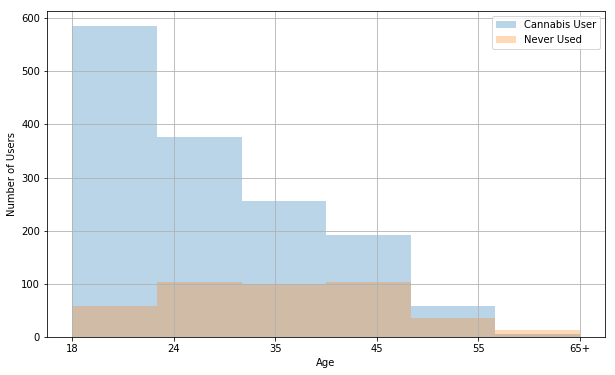

In [97]:
# 1) Observing drug consumption rate over Age

age = pd.concat([df_V[df_V.cannabis==1]['age'],df_V[df_V.cannabis==0]['age']],axis=1)
age.columns=['Cannabis User','Never Used']

AgePlot = age.plot(kind='hist',bins=6,figsize=(10,6),alpha=0.3,grid=True)
AgePlot.set(ylabel = 'Number of Users', xlabel='Age')

AgeLabels = ['0','18','24','35','45','55','65+']
AgePlot.set_xticklabels(AgeLabels)

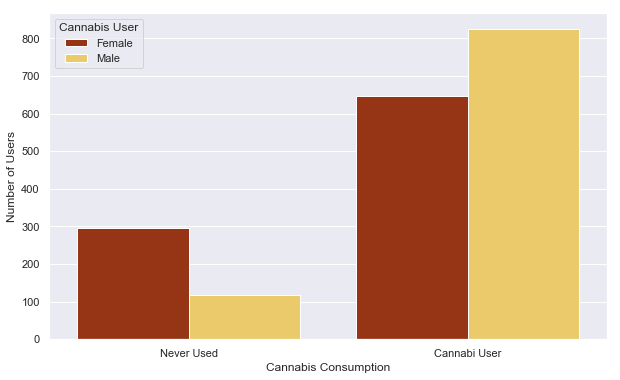

In [98]:
# 2) Validating drug consumption rate across Gender
sns.set(rc={'figure.figsize':(10,6)})
GenderPlot = sns.countplot(x='cannabis',hue='gender',data=df_V,palette='afmhot')

labels = ['Never Used', 'Cannabi User']
GenderPlot.set_xticklabels(labels)

GenderPlot.set(ylabel = 'Number of Users', xlabel='Cannabis Consumption')
plt.legend(title='Cannabis User', loc='upper left', labels=['Female', 'Male'])

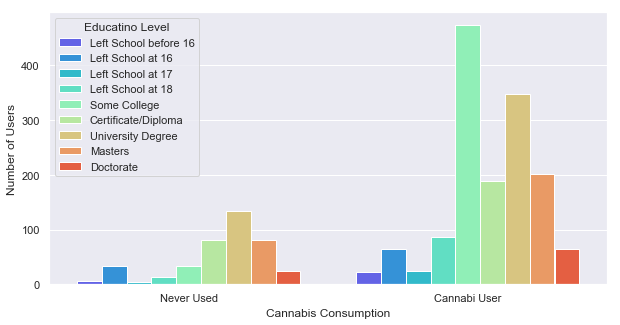

In [99]:
# 3) Analyzing drug consumption rate across Education Level
sns.set(rc={'figure.figsize':(10,5)})
x = ('yes','no')
EducationPlot = sns.countplot(x='cannabis',hue='education',data=df_V,palette='rainbow')

EducationPlot.set_xticklabels(labels)
EducationPlot.set(ylabel = 'Number of Users', xlabel='Cannabis Consumption')

plt.legend(title='Educatino Level', loc='upper left', 
           labels=['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate'])

C:\Users\kanta\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


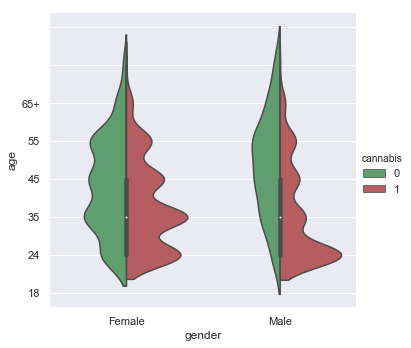

In [100]:
# 4) Analyzing drug consumption combining Age and Gender features
Age_Gender_Plot = sns.factorplot(x='gender' , y='age' , data=df_V , hue='cannabis' , kind='violin' , palette=['g','r'] , split=True)

AgeLabels = ['0','18','24','35','45','55','65+']
Age_Gender_Plot.set_yticklabels(AgeLabels)

genderlabels = ['Female', 'Male']
Age_Gender_Plot.set_xticklabels(genderlabels)


[Text(0, 0, 'Left School before 16'),
 Text(0, 0, 'Left School at 16'),
 Text(0, 0, 'Left School at 17'),
 Text(0, 0, 'Left School at 18'),
 Text(0, 0, 'Some College'),
 Text(0, 0, 'Certificate/Diploma'),
 Text(0, 0, 'University Degree'),
 Text(0, 0, 'Masters'),
 Text(0, 0, 'Doctorate')]

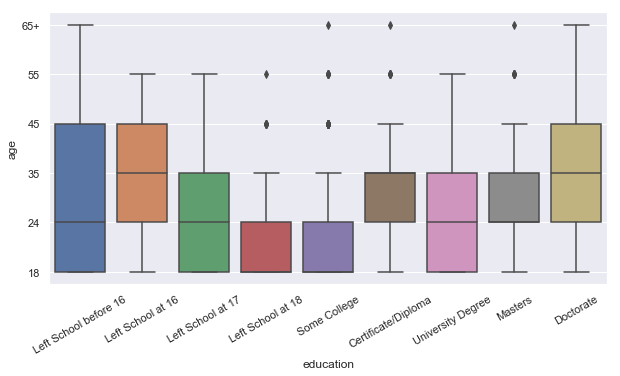

In [101]:
# 5) What if combine Age and Education Level together? 
# Focus only on the actual cannabis users

df_V2 = df_V[df_V.cannabis == 1]
Age_Education_Plot = sns.boxplot(x='education',y='age',data=df_V2)

AgeLabels = ['0','18','24','35','45','55','65+']
Age_Education_Plot.set_yticklabels(AgeLabels)

EducationLabels = ['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate']
Age_Education_Plot.set_xticklabels(EducationLabels,rotation=30)


In [102]:
# 6) Bringing all the basic personal information features above (Age, Gender, Education) together and create a pivot table

df_V2 = pd.read_csv('data/manual_personality_scores_drugdata_original_plus_onehot.csv')

ASE=df_V2[df_V2.cannabis.notnull()].pivot_table(index=['age_category','gender_category','education_category'],values=['cannabis']).sort_values('cannabis',ascending=False)

ASE.head(2)


,,,cannabis
age_category,gender_category,education_category,
35-44,M,Left_school_at_18,1.0
55-64,F,Left_school_at_17,1.0


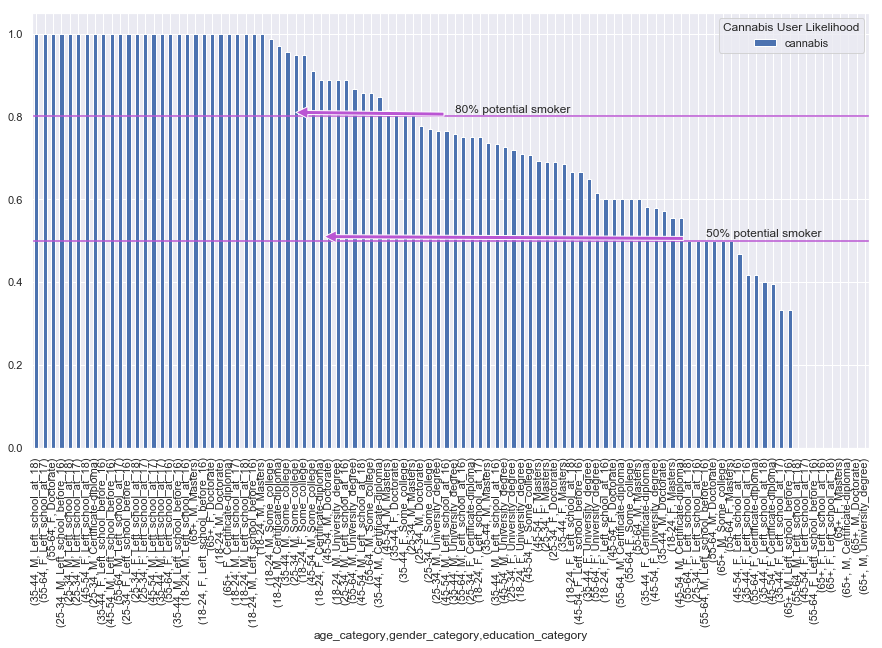

In [103]:
# From the pivot tables above, there is definitely a relationship among 'Age','Gender','Education'and 'Drug Consumer'
# So we can combine and visualize them together for ==> 'A.S.E':

ASE.plot(kind='bar',figsize=(15,8))
plt.xticks(rotation=90)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% potential smoker',xy=(30,0.81),xytext=(50,0.81),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% potential smoker',xy=(32,0.51),xytext=(80,0.51),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.legend(title='Cannabis User Likelihood', loc='upper right')

## Use GradientBoostingClassifier to see which features above are important

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

target = df_V["cannabis"]

data = df_V.drop(columns=["cannabis","id"])
feature_names = data.columns

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)
X_train.head(2)

,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation
120,3,0,6,50,31,35,29,36,6,8
757,1,1,5,52,42,38,40,23,10,9


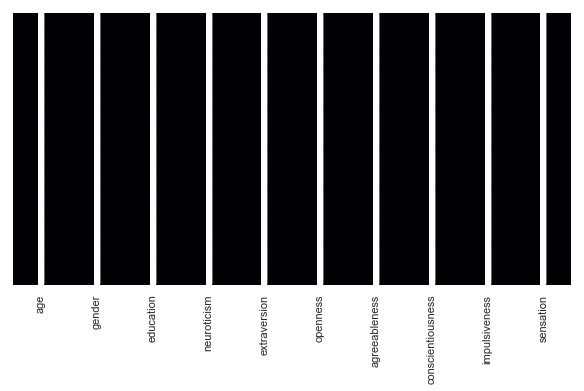

In [105]:
# Use a heatmap quickly check if there is any NULL values within any of the features
# all shaded ==> all the cells have validate data; otherwise will be hilighted in yellow
sns.heatmap(X_train.isnull(),yticklabels=False, cbar=False,cmap='inferno',annot=True)

In [106]:
# # Summary of train data
X_train.describe()

,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,2.331210,0.501062,5.997169,35.811748,39.617127,45.685067,42.836518,41.450814,4.791224,6.145789
std,1.288155,0.500176,1.738171,9.063669,6.676874,6.583999,6.315099,6.928808,2.121222,2.701899
min,1.000000,0.000000,1.000000,12.000000,16.000000,24.000000,12.000000,17.000000,1.000000,1.000000
25%,1.000000,0.000000,5.000000,29.000000,36.000000,41.000000,39.000000,37.000000,3.000000,4.000000
50%,2.000000,1.000000,6.000000,35.000000,40.000000,46.000000,43.000000,42.000000,4.000000,6.000000
75%,3.000000,1.000000,7.000000,42.000000,44.000000,51.000000,47.000000,46.000000,6.000000,8.000000
max,6.000000,1.000000,9.000000,60.000000,58.000000,60.000000,58.000000,57.000000,10.000000,10.000000


In [107]:
# use GradientBoostingClassifier to see which features are important

model=GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [108]:
model.feature_importances_

array([0.09467169, 0.04862534, 0.10124373, 0.05397198, 0.10837731,
       0.2669795 , 0.0415316 , 0.1585629 , 0.0360333 , 0.09000265])

In [109]:
FI=pd.DataFrame({'importance':model.feature_importances_},index=X_train.columns)
FI.sort_values('importance',ascending=False)

,importance
openness,0.266979
conscientiousness,0.158563
extraversion,0.108377
education,0.101244
age,0.094672
sensation,0.090003
neuroticism,0.053972
gender,0.048625
agreeableness,0.041532
impulsiveness,0.036033


Text(0.5, 1.0, 'Feature Importance')

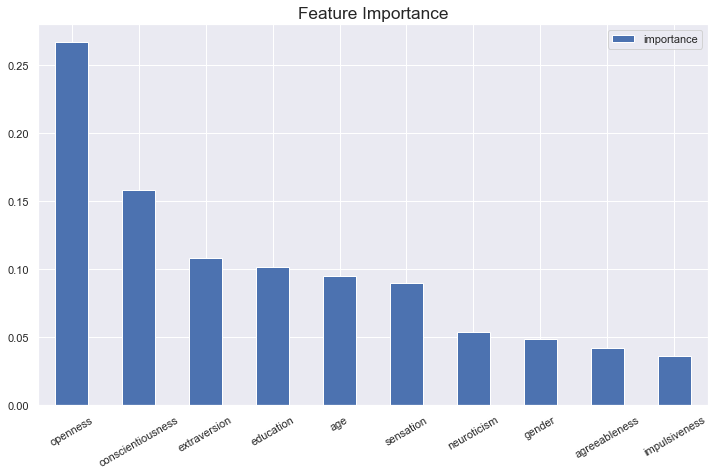

In [110]:
FI.sort_values('importance',ascending=False).plot.bar(figsize=(12,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

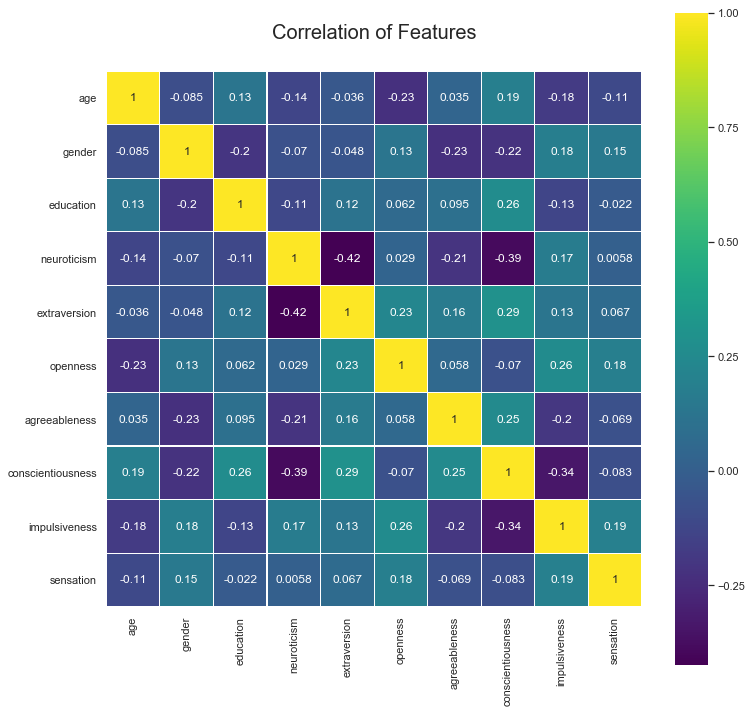

In [111]:
# Draw a Correlation heatmap for all the features
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train[['age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)